<a href="https://colab.research.google.com/github/akshatchaturvedi28/Collab-TensorFlow/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
!pip install seaborn

**Regression: Predict Fuel efficiency**

In [3]:
import tensorflow as tf
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow import keras


In [0]:
from __future__ import absolute_import, print_function, unicode_literals, division

**Get the Data**

In [0]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

Importing using Pandas

In [0]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
raw_data = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep=" ", skipinitialspace=True)

In [0]:
dataset = raw_data.copy()

In [10]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Clean the Data

In [11]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

The Origin Column in Categorical and not Numeric. So convert that to one-hot:

In [0]:
origin = dataset.pop('origin')

In [14]:
dataset['USA'] = (origin==1)*1.0
dataset['Europe'] = (origin==2)*1.0
dataset['Japan'] = (origin==3)*1.0
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


**Split the Dataset into Train and Test**

In [0]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [18]:
test_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0


Split the Label (Target) Column

In [0]:
train_labels = train_dataset.pop('mpg')
test_labels = test_dataset.pop('mpg')

**Normalize the Data**

Z score normalization { z-score = (x - mean)/standard_dev }  

In [20]:
import statistics
train_dataset.std()

cylinders         1.699788
displacement    104.331589
horsepower       38.096214
weight          843.898596
acceleration      2.789230
model year        3.675642
USA               0.485101
Europe            0.383413
Japan             0.398712
dtype: float64

In [0]:
def norm(x):
  return (x - train_dataset.mean() / train_dataset.std())

In [0]:
norm_train_data = norm(train_dataset)
norm_test_data = norm(test_dataset)

**The Model**

In [0]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), loss='mse', metrics=['mae', 'mse'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [45]:
example_batch = norm_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[26.343632],
       [26.23925 ],
       [13.211685],
       [34.276222],
       [35.53988 ],
       [20.084736],
       [36.929234],
       [28.314339],
       [19.87546 ],
       [26.222906]], dtype=float32)

**Train the Model**

In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(norm_train_data, train_labels, epochs=1000, validation_split=0.2, verbose=0, callbacks=[early_stop])

In [47]:
loss, mae, mse = model.evaluate(norm_test_data, test_labels, verbose=0)
print("Mean Absolute Error- {:5.2f} MPG".format(mae))

Mean Absolute Error-  2.00 MPG


**Make Predictions**

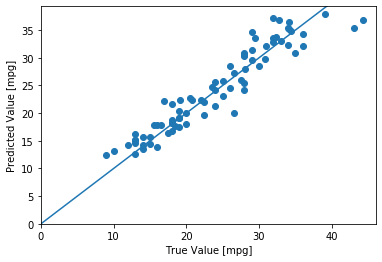

In [52]:
test_predictions = model.predict(norm_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Value [mpg]')
plt.ylabel('Predicted Value [mpg]')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100,100], [-100,100])

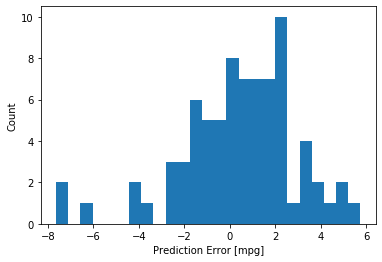

In [53]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [mpg]")
_ = plt.ylabel("Count")